In [1]:
from pandas import read_csv
import pandas as pd
import numpy as np
from numpy import nan
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, RepeatedKFold, cross_val_score
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from PyEMD import EEMD

C:\Users\Nimma Harshitha\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
series = pd.read_csv('D:/MINI/univariate_KBPS_hdr.csv',header=0,index_col=0,parse_dates=[0])
series = series.resample('5T').sum()   # T for minutes 10T - 10min, 15T - 15min, H for Hours, D for Day
print(series.head())
print(len(series))
data = series.values
data=data.flatten()

                     frame.len
Dateandtime                   
2003-12-07 05:30:00  28272.606
2003-12-07 05:35:00  66566.829
2003-12-07 05:40:00  26656.936
2003-12-07 05:45:00  32880.959
2003-12-07 05:50:00  33326.521
26209


In [3]:
emd = EEMD()
IMF = emd.eemd(data)
#print(len(IMF)
print(len(IMF[1]))
print(len(IMF[2]))
print(len(IMF[3]))
print(len(IMF))
print('-------trying loop--------')
for i in range(len(IMF)):
    print("IMF:",i)
    print(IMF[i])

26209
26209
26209
14
-------trying loop--------
IMF: 0
[ -5083.22977361  20931.96610055 -11399.80612935 ...  26198.95288139
  38669.55921685 -43776.70899529]
IMF: 1
[ 1.18001798e+01  7.96675402e+03  4.45174061e+03 ...  2.65409753e+04
  1.56648663e+04 -2.60986826e+04]
IMF: 2
[-1192.25808986  -590.10546355 -1625.037443   ... 12710.69554685
  5323.57939625 -8301.91288947]
IMF: 3
[-6012.40524019 -5802.02809504 -4833.2241313  ...   556.83941144
 -1017.99027212 -2968.43890127]
IMF: 4
[-2930.3805065  -3163.61158303 -3302.19771355 ...   -26.02497675
  -464.7914383   -798.96308296]
IMF: 5
[-1775.21556439 -1701.83423771 -1594.82000898 ...  5910.84548324
  5708.6493111   5507.20886276]
IMF: 6
[-6761.28672662 -6535.53449693 -6300.96680857 ... 20234.03341258
 20015.79099595 19765.71713157]
IMF: 7
[-6684.05137371 -6796.86568348 -6901.85151465 ...  4381.68029371
  4367.63971444  4340.53244045]
IMF: 8
[-10792.46424486 -10839.08433001 -10886.70663092 ...  -7477.4760003
  -7444.50988329  -7411.55632295]

In [4]:
#np.savetxt("IMFs of 5 Min", np.column_stack((IMF[0],IMF[1],IMF[2],IMF[3],IMF[4],IMF[5],IMF[6],IMF[7],IMF[8],IMF[9],IMF[10],IMF[11])),delimiter=",")

In [5]:
IMF.shape[0]+1

15

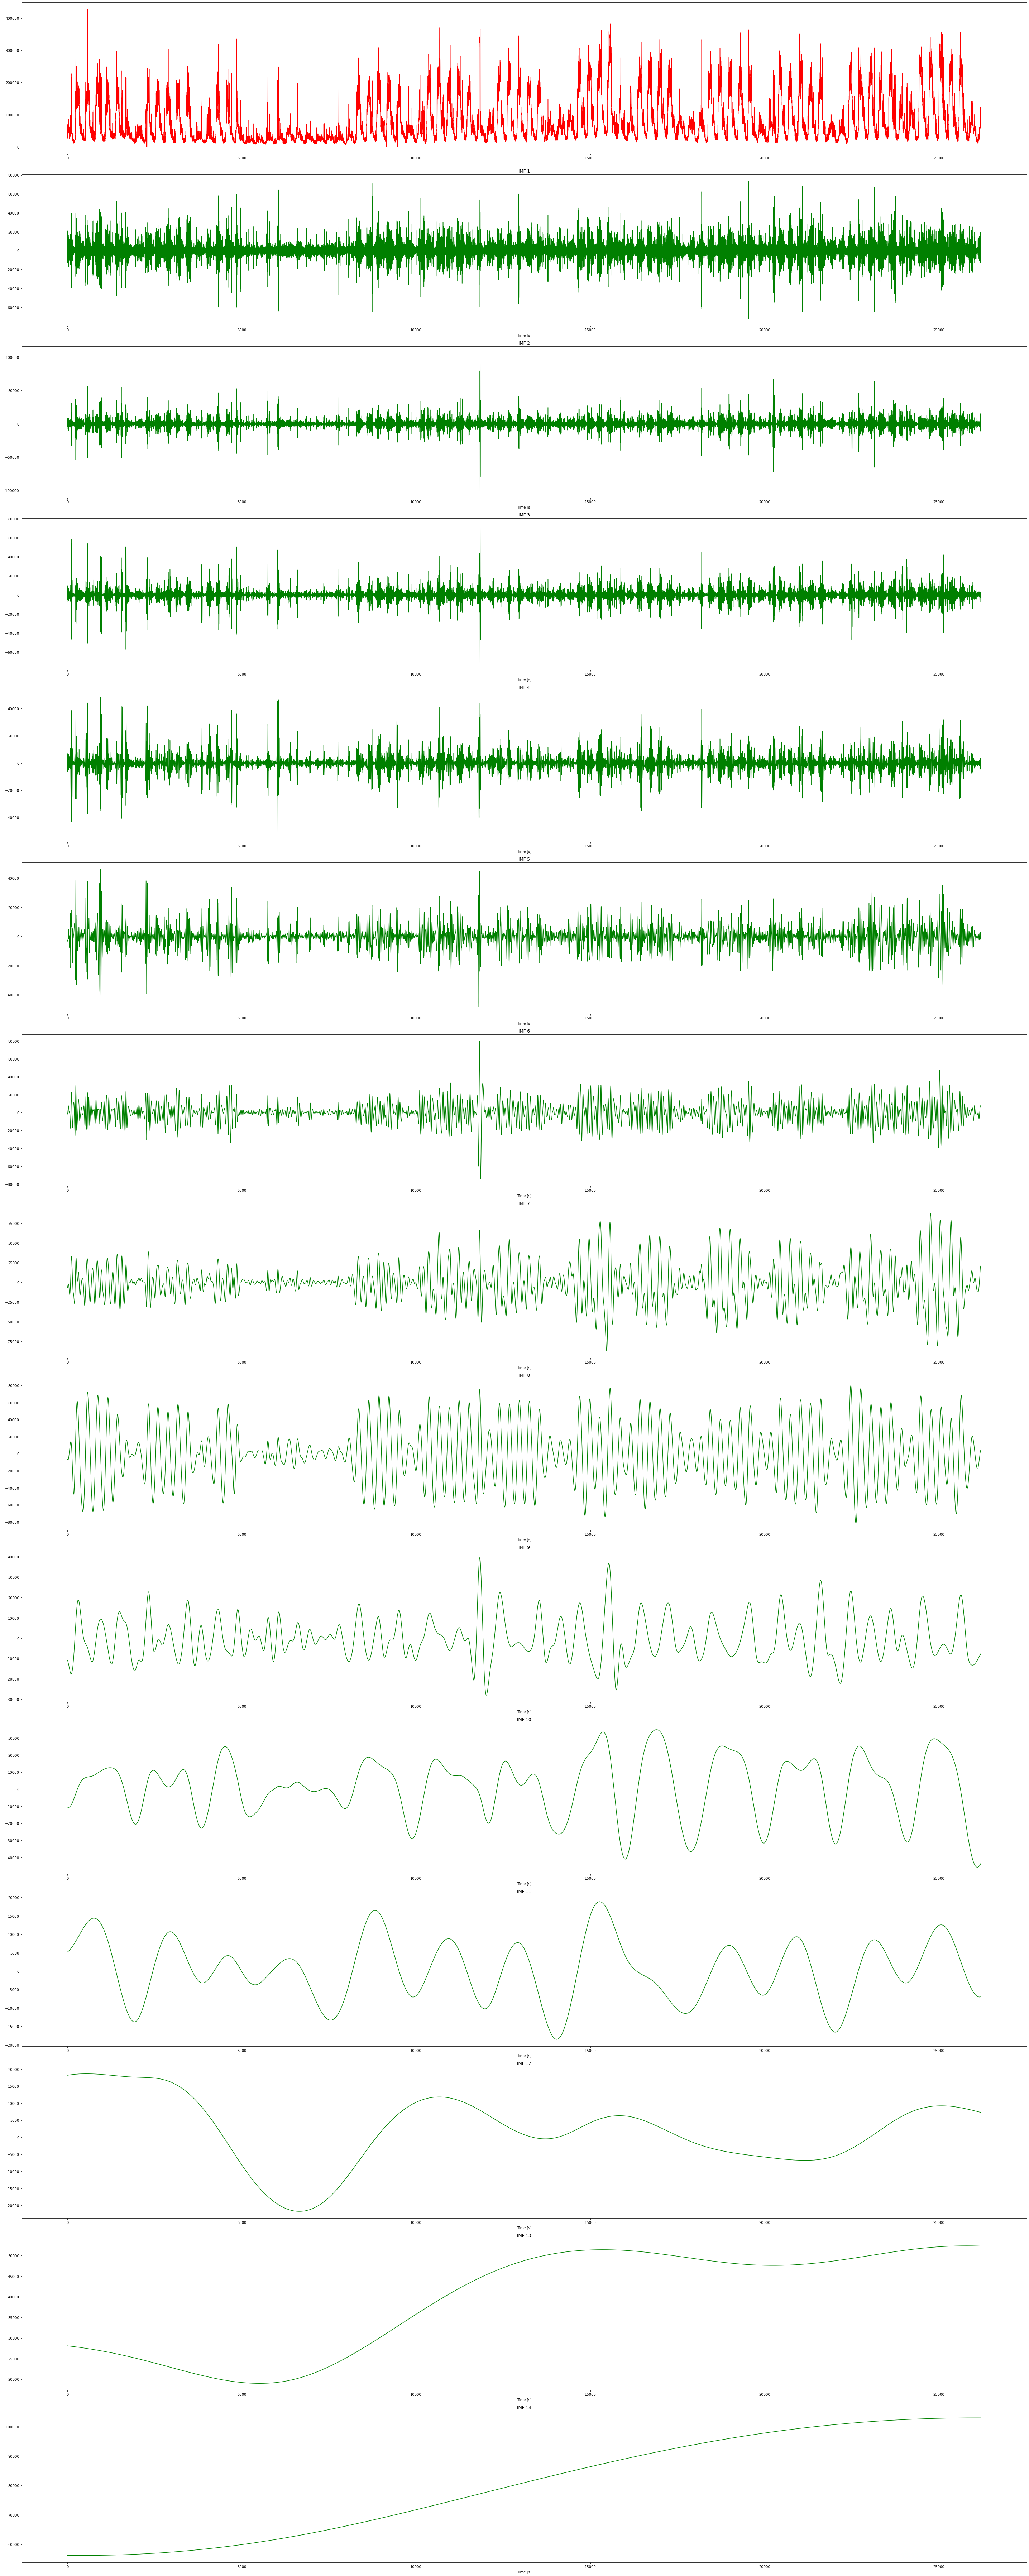

In [6]:
from matplotlib import pyplot as plt
N = IMF.shape[0]+1
plt.figure(figsize=(40,100))
plt.subplot(N,1,1)
plt.plot(data, 'r')
#plt.title("Input signal: $S(t)=cos(22\pi t^2) + 6t^2$")
#plt.xlabel("Time [s]")
for n, imf in enumerate(IMF):
    plt.subplot(N,1,n+2)
    plt.plot(imf, 'g')
    plt.title("IMF "+str(n+1))
    plt.xlabel("Time [s]")
plt.tight_layout()
plt.show()

In [7]:
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step):
        dataX.append(dataset[i:(i+time_step)])
        dataY.append(dataset[i + time_step])
    return np.array(dataX), np.array(dataY)  

In [8]:
a = int(len(IMF[0])*0.8)
print(a)
train_data_0, test_data_0 = IMF[0][0:a+1], IMF[0][a:]
print(len(train_data_0),len(test_data_0))
time_step=1
X_train_0, y_train_0 = create_dataset(train_data_0, time_step)
X_test_0, y_test_0 = create_dataset(test_data_0, time_step)

20967
20968 5242


In [9]:
b = int(len(IMF[1])*0.8)
print(b)
train_data_1, test_data_1 = IMF[1][0:a+1], IMF[1][a:]
print(len(train_data_1),len(test_data_1))
X_train_1, y_train_1 = create_dataset(train_data_1, time_step)
X_test_1, y_test_1 = create_dataset(test_data_1, time_step)

20967
20968 5242


In [10]:
c = int(len(IMF[2])*0.8)
print(c)
train_data_2, test_data_2 = IMF[2][0:a+1], IMF[2][a:]
print(len(train_data_2),len(test_data_2))
X_train_2, y_train_2 = create_dataset(train_data_2, time_step)
X_test_2, y_test_2 = create_dataset(test_data_2, time_step)

20967
20968 5242


In [11]:
d = int(len(IMF[3])*0.8)
print(d)
train_data_3, test_data_3 = IMF[3][0:a+1], IMF[3][a:]
print(len(train_data_1),len(test_data_1))
X_train_3, y_train_3 = create_dataset(train_data_3, time_step)
X_test_3, y_test_3 = create_dataset(test_data_3, time_step)

20967
20968 5242


In [12]:
e = int(len(IMF[4])*0.8)
print(e)
train_data_4, test_data_4 = IMF[4][0:a+1], IMF[4][a:]
print(len(train_data_4),len(test_data_4))
X_train_4, y_train_4 = create_dataset(train_data_4, time_step)
X_test_4, y_test_4 = create_dataset(test_data_4, time_step)

20967
20968 5242


In [13]:
f = int(len(IMF[5])*0.8)
print(f)
train_data_5, test_data_5 = IMF[5][0:a+1], IMF[5][a:]
print(len(train_data_5),len(test_data_5))
X_train_5, y_train_5 = create_dataset(train_data_5, time_step)
X_test_5, y_test_5 = create_dataset(test_data_5, time_step)

20967
20968 5242


In [14]:
g = int(len(IMF[6])*0.8)
print(g)
train_data_6, test_data_6 = IMF[6][0:a+1], IMF[6][a:]
print(len(train_data_6),len(test_data_6))
X_train_6, y_train_6 = create_dataset(train_data_6, time_step)
X_test_6, y_test_6 = create_dataset(test_data_6, time_step)

20967
20968 5242


In [15]:
h = int(len(IMF[7])*0.8)
print(h)
train_data_7, test_data_7 = IMF[7][0:a+1], IMF[7][a:]
print(len(train_data_7),len(test_data_7))
X_train_7, y_train_7 = create_dataset(train_data_7, time_step)
X_test_7, y_test_7 = create_dataset(test_data_7, time_step)

20967
20968 5242


In [16]:
i = int(len(IMF[8])*0.8)
print(i)
train_data_8, test_data_8 = IMF[8][0:a+1], IMF[8][a:]
print(len(train_data_8),len(test_data_8))
X_train_8, y_train_8 = create_dataset(train_data_8, time_step)
X_test_8, y_test_8 = create_dataset(test_data_8, time_step)

20967
20968 5242


In [17]:
i = int(len(IMF[9])*0.8)
print(i)
train_data_9, test_data_9 = IMF[9][0:a+1], IMF[9][a:]
print(len(train_data_9),len(test_data_9))
X_train_9, y_train_9 = create_dataset(train_data_9, time_step)
X_test_9, y_test_9 = create_dataset(test_data_9, time_step)

20967
20968 5242


In [18]:
i = int(len(IMF[10])*0.8)
print(i)
train_data_10, test_data_10 = IMF[10][0:a+1], IMF[10][a:]
print(len(train_data_10),len(test_data_10))
X_train_10, y_train_10 = create_dataset(train_data_10, time_step)
X_test_10, y_test_10 = create_dataset(test_data_10, time_step)

20967
20968 5242


In [19]:
i = int(len(IMF[11])*0.8)
print(i)
train_data_11, test_data_11 = IMF[11][0:a+1], IMF[11][a:]
print(len(train_data_11),len(test_data_11))
X_train_11, y_train_11 = create_dataset(train_data_11, time_step)
X_test_11, y_test_11 = create_dataset(test_data_11, time_step)

20967
20968 5242


In [20]:
i = int(len(IMF[12])*0.8)
print(i)
train_data_12, test_data_12 = IMF[12][0:a+1], IMF[12][a:]
print(len(train_data_12),len(test_data_12))
X_train_12, y_train_12 = create_dataset(train_data_12, time_step)
X_test_12, y_test_12 = create_dataset(test_data_12, time_step)

20967
20968 5242


In [21]:
i = int(len(IMF[13])*0.8)
print(i)
train_data_13, test_data_13 = IMF[13][0:a+1], IMF[13][a:]
print(len(train_data_13),len(test_data_13))
X_train_13, y_train_13 = create_dataset(train_data_13, time_step)
X_test_13, y_test_13 = create_dataset(test_data_13, time_step)

20967
20968 5242


In [22]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [23]:
def statistics(y_true, y_pred):
    MAE = metrics.mean_absolute_error(y_true, y_pred)
    print('Mean Absolute Error : %.3f' % MAE )
    RMSE = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
    print('Root Mean Squared Error : %.3f' % RMSE )
    MSE = metrics.mean_squared_error(y_true, y_pred)
    print('Mean Squared Error : %.3f' % MSE, )
    MAPE = mean_absolute_percentage_error(y_true, y_pred)
    print('MAPE  :%.3f' % MAPE)
    NRMSE = RMSE/(np.max(y_true)- np.min(y_true))
    print('Normalized Root Mean Squared Error : %.3f' % NRMSE )
    d=[]
    d.append(MAE)
    d.append(RMSE)
    d.append(MSE)
    d.append(MAPE)
    d.append(NRMSE)
    return d

# Random Forest

In [24]:
rf = RandomForestRegressor()
rf.fit(X_train_0,y_train_0)
rf_pred_0 = rf.predict(X_test_0)

In [25]:
rf.fit(X_train_1,y_train_1)
rf_pred_1 = rf.predict(X_test_1)

rf.fit(X_train_2,y_train_2)
rf_pred_2 = rf.predict(X_test_2)

In [26]:
rf.fit(X_train_3,y_train_3)
rf_pred_3 = rf.predict(X_test_3)

rf.fit(X_train_4,y_train_4)
rf_pred_4 = rf.predict(X_test_4)

In [27]:
rf.fit(X_train_5,y_train_5)
rf_pred_5 = rf.predict(X_test_5)

rf.fit(X_train_6,y_train_6)
rf_pred_6 = rf.predict(X_test_6)

In [30]:
rf.fit(X_train_7,y_train_7)
rf_pred_7 = rf.predict(X_test_7)

rf.fit(X_train_8,y_train_8)
rf_pred_8 = rf.predict(X_test_8)

In [31]:
rf.fit(X_train_9,y_train_9)
rf_pred_9 = rf.predict(X_test_9)

rf.fit(X_train_10,y_train_10)
rf_pred_10 = rf.predict(X_test_10)

rf.fit(X_train_11,y_train_11)
rf_pred_11 = rf.predict(X_test_11)

rf.fit(X_train_12,y_train_12)
rf_pred_12 = rf.predict(X_test_12)

rf.fit(X_train_13,y_train_13)
rf_pred_13 = rf.predict(X_test_13)

In [32]:
final_rf_pred = rf_pred_0+rf_pred_1+rf_pred_2+rf_pred_3+rf_pred_4+rf_pred_5+rf_pred_6+rf_pred_7+rf_pred_8+rf_pred_9+rf_pred_10+rf_pred_11+rf_pred_12+rf_pred_13
actual_y_test = y_test_1+y_test_2+y_test_3+y_test_4+y_test_5+y_test_6+y_test_7+y_test_8+y_test_9+y_test_10+y_test_11+y_test_12+y_test_13
rff1=[]
rff1.append("RandomForest")
rff1.append("5 mins")
rff1.extend(statistics(actual_y_test,final_rf_pred))

Mean Absolute Error : 9490.507
Root Mean Squared Error : 13535.434
Mean Squared Error : 183207969.386
MAPE  :6.549
Normalized Root Mean Squared Error : 0.039


# XGBoost

In [33]:
xgbr = XGBRegressor()

xgbr.fit(X_train_0,y_train_0)
xgbr_pred_0 = xgbr.predict(X_test_0)

xgbr.fit(X_train_1,y_train_1)
xgbr_pred_1 = xgbr.predict(X_test_1)

In [34]:
xgbr.fit(X_train_2,y_train_2)
xgbr_pred_2 = xgbr.predict(X_test_2)

xgbr.fit(X_train_3,y_train_3)
xgbr_pred_3 = xgbr.predict(X_test_3)

In [35]:
xgbr.fit(X_train_4,y_train_4)
xgbr_pred_4 = xgbr.predict(X_test_4)

xgbr.fit(X_train_5,y_train_5)
xgbr_pred_5 = xgbr.predict(X_test_5)

In [36]:
xgbr.fit(X_train_6,y_train_6)
xgbr_pred_6 = xgbr.predict(X_test_6)

xgbr.fit(X_train_7,y_train_7)
xgbr_pred_7 = xgbr.predict(X_test_7)

In [37]:
xgbr.fit(X_train_8,y_train_8)
xgbr_pred_8 = xgbr.predict(X_test_8)

xgbr.fit(X_train_9,y_train_9)
xgbr_pred_9 = xgbr.predict(X_test_9)

In [38]:
xgbr.fit(X_train_10,y_train_10)
xgbr_pred_10 = xgbr.predict(X_test_10)

xgbr.fit(X_train_11,y_train_11)
xgbr_pred_11 = xgbr.predict(X_test_11)

xgbr.fit(X_train_12,y_train_12)
xgbr_pred_12 = xgbr.predict(X_test_12)

xgbr.fit(X_train_13,y_train_13)
xgbr_pred_13 = xgbr.predict(X_test_13)

In [39]:
final_xgbr_pred = xgbr_pred_0+xgbr_pred_1+xgbr_pred_2+xgbr_pred_3+xgbr_pred_4+xgbr_pred_5+xgbr_pred_6+xgbr_pred_7+xgbr_pred_8+xgbr_pred_9+xgbr_pred_10+xgbr_pred_11+xgbr_pred_12+xgbr_pred_13
xbr1=[]
xbr1.append('XGBRegressor')
xbr1.append("5 mins")
xbr1.extend(statistics(actual_y_test,final_xgbr_pred))

Mean Absolute Error : 7821.108
Root Mean Squared Error : 11953.093
Mean Squared Error : 142876443.503
MAPE  :5.143
Normalized Root Mean Squared Error : 0.034


# LGBM

In [40]:
lgb = LGBMRegressor()

lgb.fit(X_train_0,y_train_0)
lgb_pred_0 = lgb.predict(X_test_0)

lgb.fit(X_train_1,y_train_1)
lgb_pred_1 = lgb.predict(X_test_1)

lgb.fit(X_train_2,y_train_2)
lgb_pred_2 = lgb.predict(X_test_2)

lgb.fit(X_train_3,y_train_3)
lgb_pred_3 = lgb.predict(X_test_3)

lgb.fit(X_train_4,y_train_4)
lgb_pred_4 = lgb.predict(X_test_4)

lgb.fit(X_train_5,y_train_5)
lgb_pred_5 = lgb.predict(X_test_5)

lgb.fit(X_train_6,y_train_6)
lgb_pred_6 = lgb.predict(X_test_6)

lgb.fit(X_train_7,y_train_7)
lgb_pred_7 = lgb.predict(X_test_7)

lgb.fit(X_train_8,y_train_8)
lgb_pred_8 = lgb.predict(X_test_8)

lgb.fit(X_train_9,y_train_9)
lgb_pred_9 = lgb.predict(X_test_9)

lgb.fit(X_train_10,y_train_10)
lgb_pred_10 = lgb.predict(X_test_10)

lgb.fit(X_train_11,y_train_11)
lgb_pred_11 = lgb.predict(X_test_11)

lgb.fit(X_train_12,y_train_12)
lgb_pred_12 = lgb.predict(X_test_12)

lgb.fit(X_train_13,y_train_13)
lgb_pred_13 = lgb.predict(X_test_13)


final_lgb_pred = lgb_pred_0+lgb_pred_1+lgb_pred_2+lgb_pred_3+lgb_pred_4+lgb_pred_5+lgb_pred_6+lgb_pred_7+lgb_pred_8+lgb_pred_9+lgb_pred_10+lgb_pred_11+lgb_pred_12+lgb_pred_13
lgbm1=[]
lgbm1.append("LGBM")
lgbm1.append("5 mins")
lgbm1.extend(statistics(actual_y_test,final_lgb_pred))

Mean Absolute Error : 7862.385
Root Mean Squared Error : 11638.244
Mean Squared Error : 135448733.192
MAPE  :5.251
Normalized Root Mean Squared Error : 0.033


# MAE, RMSE, MSE, MAPE, NRMSE for 5 mins

In [42]:
final=[]
final.append(rff1)
final.append(xbr1)
final.append(lgbm1)
data=pd.DataFrame(final,columns=['Algorithm','Minutes','MAE','RMSE','MSE','MAPE','NRMSE'])
data

Algorithm Minutes          MAE          RMSE           MSE      MAPE  \
0  RandomForest  5 mins  9490.507109  13535.433846  1.832080e+08  6.548765   
1  XGBRegressor  5 mins  7821.108242  11953.093470  1.428764e+08  5.143234   
2          LGBM  5 mins  7862.384622  11638.244421  1.354487e+08  5.251319   

      NRMSE  
0  0.038669  
1  0.034148  
2  0.033249

# 10 mins

In [44]:
series = pd.read_csv('D:/MINI/univariate_KBPS_hdr.csv',header=0,index_col=0,parse_dates=[0])
series = series.resample('10T').sum()   # T for minutes 10T - 10min, 15T - 15min, H for Hours, D for Day
print(series.head())
print(len(series))
data = series.values
data=data.flatten()

                      frame.len
Dateandtime                    
2003-12-07 05:30:00   94839.435
2003-12-07 05:40:00   59537.895
2003-12-07 05:50:00   60293.757
2003-12-07 06:00:00   83634.900
2003-12-07 06:10:00  130818.833
13105


In [45]:
emd = EEMD()
IMF = emd.eemd(data)
#print(len(IMF)
print(len(IMF[1]))
print(len(IMF[2]))
print(len(IMF[3]))
print(len(IMF))
print('-------trying loop--------')
for i in range(len(IMF)):
    print("IMF:",i)
    print(IMF[i])

13105
13105
13105
13
-------trying loop--------
IMF: 0
[   8485.78182335  -13440.58688118  -17549.9199667  ...  -63253.1447355
   96994.87212447 -100594.28038595]
IMF: 1
[ -4098.19065706 -16804.74799839 -18108.8388284  ...  31839.99607638
  29309.80175859 -39664.37466722]
IMF: 2
[ -2656.21816219  -4049.9684191   -2710.8489301  ...   9663.51722375
  -1473.91530586 -16104.40832487]
IMF: 3
[-2151.40465862 -2965.03676575 -3616.4161231  ...  3255.64308811
   472.62220994 -2263.80415641]
IMF: 4
[ 4522.94625816  4938.32690249  5614.60415571 ... 20520.70776055
 18855.37808538 16986.25720153]
IMF: 5
[-26968.54899246 -26837.53301568 -26639.65612792 ...  43953.75832413
  43228.20421483  42237.56822193]
IMF: 6
[-5597.336496   -5969.8847531  -6352.89854662 ... -5482.01960058
 -5637.47475588 -5820.63524457]
IMF: 7
[-28329.2096094  -28397.25333383 -28461.7592715  ... -42419.05126039
 -42157.39057754 -41893.39091649]
IMF: 8
[-17317.30054108 -17325.2640403  -17331.50716045 ... -75646.44687756
 -75535.8

In [46]:
#np.savetxt("IMFs of 10 Min", np.column_stack((IMF[0],IMF[1],IMF[2],IMF[3],IMF[4],IMF[5],IMF[6],IMF[7],IMF[8],IMF[9],IMF[10],IMF[11])),delimiter=",")

In [47]:
IMF.shape[0]+1

14

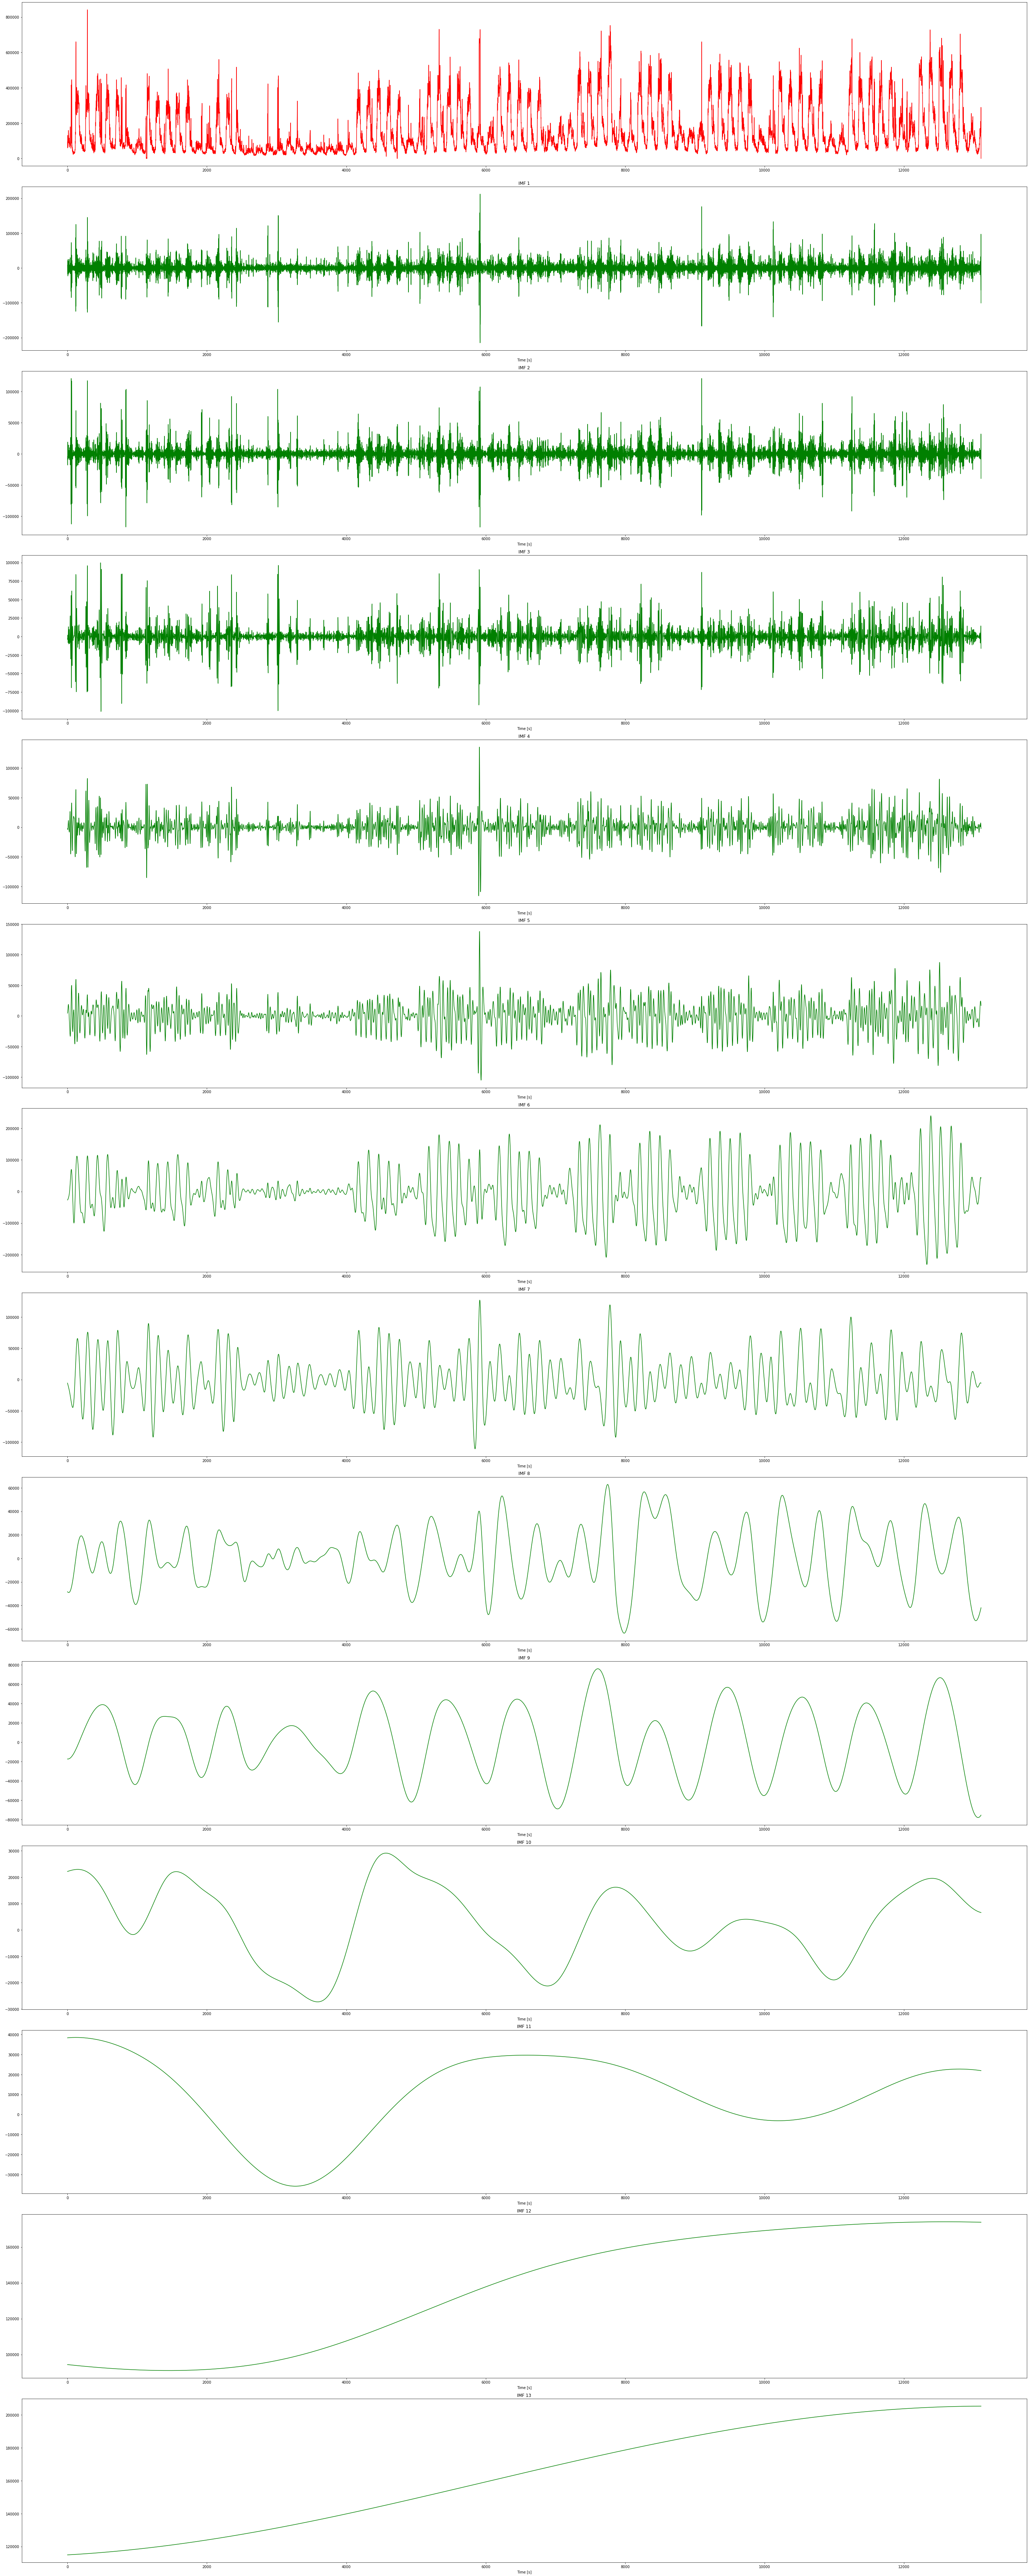

In [48]:
from matplotlib import pyplot as plt
N = IMF.shape[0]+1
plt.figure(figsize=(40,100))
plt.subplot(N,1,1)
plt.plot(data, 'r')
for n, imf in enumerate(IMF):
    plt.subplot(N,1,n+2)
    plt.plot(imf, 'g')
    plt.title("IMF "+str(n+1))
    plt.xlabel("Time [s]")
plt.tight_layout()
plt.show()

In [49]:
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step):
        dataX.append(dataset[i:(i+time_step)])
        dataY.append(dataset[i + time_step])
    return np.array(dataX), np.array(dataY) 

In [50]:
a = int(len(IMF[0])*0.8)
print(a)
train_data_0, test_data_0 = IMF[0][0:a+1], IMF[0][a:]
print(len(train_data_0),len(test_data_0))
time_step=1
X_train_0, y_train_0 = create_dataset(train_data_0, time_step)
X_test_0, y_test_0 = create_dataset(test_data_0, time_step)

10484
10485 2621


In [51]:
b = int(len(IMF[1])*0.8)
print(b)
train_data_1, test_data_1 = IMF[1][0:a+1], IMF[1][a:]
print(len(train_data_1),len(test_data_1))
X_train_1, y_train_1 = create_dataset(train_data_1, time_step)
X_test_1, y_test_1 = create_dataset(test_data_1, time_step)

10484
10485 2621


In [52]:
c = int(len(IMF[2])*0.8)
print(c)
train_data_2, test_data_2 = IMF[2][0:a+1], IMF[2][a:]
print(len(train_data_2),len(test_data_2))
X_train_2, y_train_2 = create_dataset(train_data_2, time_step)
X_test_2, y_test_2 = create_dataset(test_data_2, time_step)

10484
10485 2621


In [53]:
d = int(len(IMF[3])*0.8)
print(d)
train_data_3, test_data_3 = IMF[3][0:a+1], IMF[3][a:]
print(len(train_data_1),len(test_data_1))
X_train_3, y_train_3 = create_dataset(train_data_3, time_step)
X_test_3, y_test_3 = create_dataset(test_data_3, time_step)

10484
10485 2621


In [54]:
e = int(len(IMF[4])*0.8)
print(e)
train_data_4, test_data_4 = IMF[4][0:a+1], IMF[4][a:]
print(len(train_data_4),len(test_data_4))
X_train_4, y_train_4 = create_dataset(train_data_4, time_step)
X_test_4, y_test_4 = create_dataset(test_data_4, time_step)

10484
10485 2621


In [55]:
e = int(len(IMF[4])*0.8)
print(e)
train_data_4, test_data_4 = IMF[4][0:a+1], IMF[4][a:]
print(len(train_data_4),len(test_data_4))
X_train_4, y_train_4 = create_dataset(train_data_4, time_step)
X_test_4, y_test_4 = create_dataset(test_data_4, time_step)

10484
10485 2621


In [56]:
f = int(len(IMF[5])*0.8)
print(f)
train_data_5, test_data_5 = IMF[5][0:a+1], IMF[5][a:]
print(len(train_data_5),len(test_data_5))
X_train_5, y_train_5 = create_dataset(train_data_5, time_step)
X_test_5, y_test_5 = create_dataset(test_data_5, time_step)

10484
10485 2621


In [57]:
g = int(len(IMF[6])*0.8)
print(g)
train_data_6, test_data_6 = IMF[6][0:a+1], IMF[6][a:]
print(len(train_data_6),len(test_data_6))
X_train_6, y_train_6 = create_dataset(train_data_6, time_step)
X_test_6, y_test_6 = create_dataset(test_data_6, time_step)

10484
10485 2621


In [58]:
h = int(len(IMF[7])*0.8)
print(h)
train_data_7, test_data_7 = IMF[7][0:a+1], IMF[7][a:]
print(len(train_data_7),len(test_data_7))
X_train_7, y_train_7 = create_dataset(train_data_7, time_step)
X_test_7, y_test_7 = create_dataset(test_data_7, time_step)

10484
10485 2621


In [59]:
i = int(len(IMF[8])*0.8)
print(i)
train_data_8, test_data_8 = IMF[8][0:a+1], IMF[8][a:]
print(len(train_data_8),len(test_data_8))
X_train_8, y_train_8 = create_dataset(train_data_8, time_step)
X_test_8, y_test_8 = create_dataset(test_data_8, time_step)

10484
10485 2621


In [60]:
i = int(len(IMF[9])*0.8)
print(i)
train_data_9, test_data_9 = IMF[9][0:a+1], IMF[9][a:]
print(len(train_data_9),len(test_data_9))
X_train_9, y_train_9 = create_dataset(train_data_9, time_step)
X_test_9, y_test_9 = create_dataset(test_data_9, time_step)

10484
10485 2621


In [61]:
i = int(len(IMF[10])*0.8)
print(i)
train_data_10, test_data_10 = IMF[10][0:a+1], IMF[10][a:]
print(len(train_data_10),len(test_data_10))
X_train_10, y_train_10 = create_dataset(train_data_10, time_step)
X_test_10, y_test_10 = create_dataset(test_data_10, time_step)

10484
10485 2621


In [62]:
i = int(len(IMF[11])*0.8)
print(i)
train_data_11, test_data_11 = IMF[11][0:a+1], IMF[11][a:]
print(len(train_data_11),len(test_data_11))
X_train_11, y_train_11 = create_dataset(train_data_11, time_step)
X_test_11, y_test_11 = create_dataset(test_data_11, time_step)

10484
10485 2621


In [63]:
i = int(len(IMF[12])*0.8)
print(i)
train_data_12, test_data_12 = IMF[12][0:a+1], IMF[12][a:]
print(len(train_data_12),len(test_data_12))
X_train_12, y_train_12 = create_dataset(train_data_12, time_step)
X_test_12, y_test_12 = create_dataset(test_data_12, time_step)

10484
10485 2621


In [64]:
train_data_1

array([ -4098.19065706, -16804.74799839, -18108.8388284 , ...,
        -5437.20738976,  -4879.15691777,   7453.31825346])

In [65]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [66]:
def statistics(y_true, y_pred):
    MAE = metrics.mean_absolute_error(y_true, y_pred)
    print('Mean Absolute Error : %.3f' % MAE )
    RMSE = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
    print('Root Mean Squared Error : %.3f' % RMSE )
    MSE = metrics.mean_squared_error(y_true, y_pred)
    print('Mean Squared Error : %.3f' % MSE, )
    MAPE = mean_absolute_percentage_error(y_true, y_pred)
    print('MAPE  :%.3f' % MAPE)
    NRMSE = RMSE/(np.max(y_true)- np.min(y_true))
    print('Normalized Root Mean Squared Error : %.3f' % NRMSE )
    d=[]
    d.append(MAE)
    d.append(RMSE)
    d.append(MSE)
    d.append(MAPE)
    d.append(NRMSE)
    return d

# Random Forest

In [67]:
rf = RandomForestRegressor()
rf.fit(X_train_0,y_train_0)
rf_pred_0 = rf.predict(X_test_0)

rf.fit(X_train_1,y_train_1)
rf_pred_1 = rf.predict(X_test_1)


rf.fit(X_train_2,y_train_2)
rf_pred_2 = rf.predict(X_test_2)

rf.fit(X_train_3,y_train_3)
rf_pred_3 = rf.predict(X_test_3)

rf.fit(X_train_4,y_train_4)
rf_pred_4 = rf.predict(X_test_4)

rf.fit(X_train_5,y_train_5)
rf_pred_5 = rf.predict(X_test_5)

rf.fit(X_train_6,y_train_6)
rf_pred_6 = rf.predict(X_test_6)

rf.fit(X_train_7,y_train_7)
rf_pred_7 = rf.predict(X_test_7)

rf.fit(X_train_8,y_train_8)
rf_pred_8 = rf.predict(X_test_8)

rf.fit(X_train_9,y_train_9)
rf_pred_9 = rf.predict(X_test_9)

rf.fit(X_train_10,y_train_10)
rf_pred_10 = rf.predict(X_test_10)

rf.fit(X_train_11,y_train_11)
rf_pred_11 = rf.predict(X_test_11)

rf.fit(X_train_12,y_train_12)
rf_pred_12 = rf.predict(X_test_12)


final_rf_pred = rf_pred_0+rf_pred_1+rf_pred_2+rf_pred_3+rf_pred_4+rf_pred_5+rf_pred_6+rf_pred_7+rf_pred_8+rf_pred_9+rf_pred_10+rf_pred_11+rf_pred_12

actual_y_test = y_test_1+y_test_2+y_test_3+y_test_4+y_test_5+y_test_6+y_test_7+y_test_8+y_test_9+y_test_10+y_test_11+y_test_12

rff2=[]
rff2.append("RandomForest")
rff2.append("10 mins")
rff2.extend(statistics(actual_y_test,final_rf_pred))

Mean Absolute Error : 19888.628
Root Mean Squared Error : 28428.598
Mean Squared Error : 808185156.564
MAPE  :5.202
Normalized Root Mean Squared Error : 0.043


# XGBoost

In [68]:
xgbr = XGBRegressor()

xgbr.fit(X_train_0,y_train_0)
xgbr_pred_0 = xgbr.predict(X_test_0)

xgbr.fit(X_train_1,y_train_1)
xgbr_pred_1 = xgbr.predict(X_test_1)

xgbr.fit(X_train_2,y_train_2)
xgbr_pred_2 = xgbr.predict(X_test_2)

xgbr.fit(X_train_3,y_train_3)
xgbr_pred_3 = xgbr.predict(X_test_3)


xgbr.fit(X_train_4,y_train_4)
xgbr_pred_4 = xgbr.predict(X_test_4)

xgbr.fit(X_train_5,y_train_5)
xgbr_pred_5 = xgbr.predict(X_test_5)

xgbr.fit(X_train_6,y_train_6)
xgbr_pred_6 = xgbr.predict(X_test_6)

xgbr.fit(X_train_7,y_train_7)
xgbr_pred_7 = xgbr.predict(X_test_7)



xgbr.fit(X_train_8,y_train_8)
xgbr_pred_8 = xgbr.predict(X_test_8)

xgbr.fit(X_train_9,y_train_9)
xgbr_pred_9 = xgbr.predict(X_test_9)

xgbr.fit(X_train_10,y_train_10)
xgbr_pred_10 = xgbr.predict(X_test_10)

xgbr.fit(X_train_11,y_train_11)
xgbr_pred_11 = xgbr.predict(X_test_11)

xgbr.fit(X_train_12,y_train_12)
xgbr_pred_12 = xgbr.predict(X_test_12)

final_xgbr_pred = xgbr_pred_0+xgbr_pred_1+xgbr_pred_2+xgbr_pred_3+xgbr_pred_4+xgbr_pred_5+xgbr_pred_6+xgbr_pred_7+xgbr_pred_8+xgbr_pred_9+xgbr_pred_10+xgbr_pred_11+xgbr_pred_12



xbr2=[]
xbr2.append('XGBRegressor')
xbr2.append("10 mins")
xbr2.extend(statistics(actual_y_test,final_xgbr_pred))

Mean Absolute Error : 16885.283
Root Mean Squared Error : 25453.719
Mean Squared Error : 647891818.260
MAPE  :4.278
Normalized Root Mean Squared Error : 0.038


# LGBM

In [69]:
lgb = LGBMRegressor()

lgb.fit(X_train_0,y_train_0)
lgb_pred_0 = lgb.predict(X_test_0)

lgb.fit(X_train_1,y_train_1)
lgb_pred_1 = lgb.predict(X_test_1)

lgb.fit(X_train_2,y_train_2)
lgb_pred_2 = lgb.predict(X_test_2)

lgb.fit(X_train_3,y_train_3)
lgb_pred_3 = lgb.predict(X_test_3)

lgb.fit(X_train_4,y_train_4)
lgb_pred_4 = lgb.predict(X_test_4)

lgb.fit(X_train_5,y_train_5)
lgb_pred_5 = lgb.predict(X_test_5)

lgb.fit(X_train_6,y_train_6)
lgb_pred_6 = lgb.predict(X_test_6)

lgb.fit(X_train_7,y_train_7)
lgb_pred_7 = lgb.predict(X_test_7)

lgb.fit(X_train_8,y_train_8)
lgb_pred_8 = lgb.predict(X_test_8)

lgb.fit(X_train_9,y_train_9)
lgb_pred_9 = lgb.predict(X_test_9)

lgb.fit(X_train_10,y_train_10)
lgb_pred_10 = lgb.predict(X_test_10)

lgb.fit(X_train_11,y_train_11)
lgb_pred_11 = lgb.predict(X_test_11)

lgb.fit(X_train_12,y_train_12)
lgb_pred_12 = lgb.predict(X_test_12)


final_lgb_pred = lgb_pred_0+lgb_pred_1+lgb_pred_2+lgb_pred_3+lgb_pred_4+lgb_pred_5+lgb_pred_6+lgb_pred_7+lgb_pred_8+lgb_pred_9+lgb_pred_10+lgb_pred_11+lgb_pred_12
lgbm2=[]
lgbm2.append("LGBM")
lgbm2.append("10 mins")
lgbm2.extend(statistics(actual_y_test,final_lgb_pred))

Mean Absolute Error : 16487.610
Root Mean Squared Error : 23549.792
Mean Squared Error : 554592697.635
MAPE  :4.242
Normalized Root Mean Squared Error : 0.035


# MAE, RMSE, MSE, MAPE, NRMSE for 10 mins

In [70]:
final=[]
final.append(rff2)
final.append(xbr2)
final.append(lgbm2)
data=pd.DataFrame(final,columns=['Algorithm',' Minutes','MAE','RMSE','MSE','MAPE','NRMSE'])
data

Algorithm  Minutes           MAE          RMSE           MSE      MAPE  \
0  RandomForest  10 mins  19888.627546  28428.597513  8.081852e+08  5.202032   
1  XGBRegressor  10 mins  16885.282689  25453.719144  6.478918e+08  4.278050   
2          LGBM  10 mins  16487.609549  23549.791881  5.545927e+08  4.241833   

      NRMSE  
0  0.042600  
1  0.038143  
2  0.035290

# 15 mins

In [72]:
series = pd.read_csv('D:/MINI/univariate_KBPS_hdr.csv',header=0,index_col=0,parse_dates=[0])
series = series.resample('15T').sum()   # T for minutes 10T - 10min, 15T - 15min, H for Hours, D for Day
print(series.head())
print(len(series))
data = series.values
data=data.flatten()

                      frame.len
Dateandtime                    
2003-12-07 05:30:00  121496.371
2003-12-07 05:45:00   93174.716
2003-12-07 06:00:00  145148.616
2003-12-07 06:15:00  192187.746
2003-12-07 06:30:00   96240.932
8737


In [73]:
emd = EEMD()
IMF = emd.eemd(data)
#print(len(IMF)
print(len(IMF[1]))
print(len(IMF[2]))
print(len(IMF[3]))
print(len(IMF))
print('-------trying loop--------')
for i in range(len(IMF)):
    print("IMF:",i)
    print(IMF[i])

8737
8737
8737
12
-------trying loop--------
IMF: 0
[ -11193.87547538  -36664.35185558    9426.24887291 ...  -75396.08976213
  110990.9088838  -115254.76826006]
IMF: 1
[ -9866.41701092 -10642.34646137   9250.35444345 ...  51070.09115884
  38658.80148953 -57469.66129222]
IMF: 2
[ -4396.27288655  -4991.80129919  -7039.34058647 ...  17937.27050358
   -919.70487519 -23999.7736913 ]
IMF: 3
[ 4565.20338874  5578.9900539   7815.27959675 ... 22047.00447492
 14620.79892301  7462.33821963]
IMF: 4
[-45820.56215172 -46557.27392117 -47144.45546076 ...  52839.4667125
  49677.54455012  45835.09514383]
IMF: 5
[14334.31881531 14882.78851309 15418.64964235 ... 20598.88216768
 20012.55815212 19120.58501292]
IMF: 6
[-45398.36889082 -45982.56439492 -46554.59729333 ... -49251.72246003
 -49127.50165633 -48989.82777376]
IMF: 7
[ -38796.31699332  -38862.6292447   -38920.13256121 ... -127668.57796359
 -127390.6058377  -127103.41699766]
IMF: 8
[ 28215.05435639  28237.5576473   28260.47537475 ... -16855.55800937


In [74]:
#np.savetxt("IMFs of 15 Min", np.column_stack((IMF[0],IMF[1],IMF[2],IMF[3],IMF[4],IMF[5],IMF[6],IMF[7],IMF[8],IMF[9],IMF[10],IMF[11])),delimiter=",")

In [75]:
IMF.shape[0]+1

13

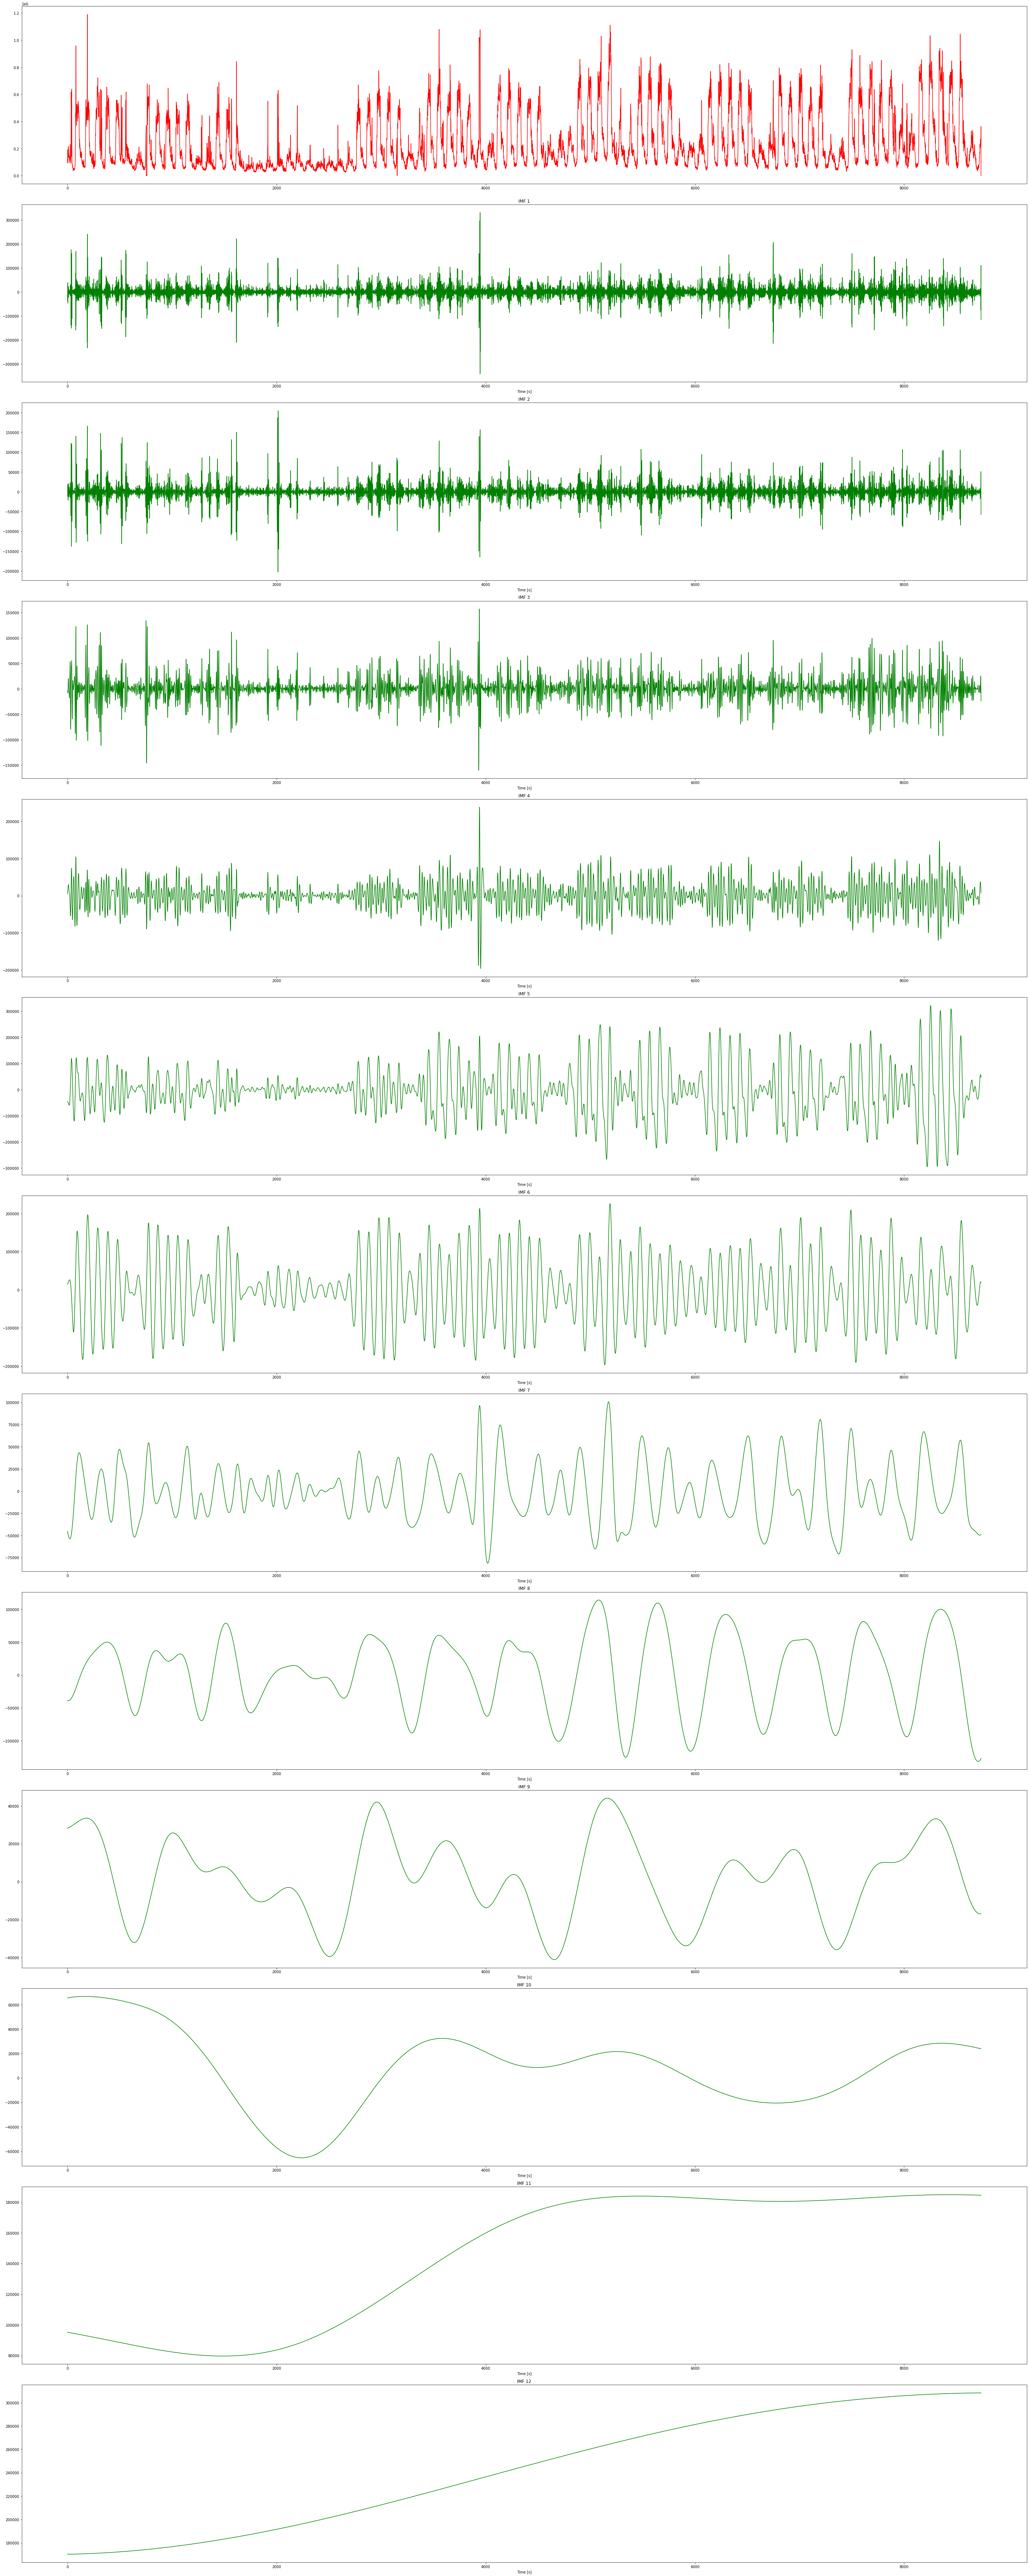

In [76]:
from matplotlib import pyplot as plt
N = IMF.shape[0]+1
plt.figure(figsize=(40,100))
plt.subplot(N,1,1)
plt.plot(data, 'r')
for n, imf in enumerate(IMF):
    plt.subplot(N,1,n+2)
    plt.plot(imf, 'g')
    plt.title("IMF "+str(n+1))
    plt.xlabel("Time [s]")
plt.tight_layout()
plt.show()

In [77]:
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step):
        dataX.append(dataset[i:(i+time_step)])
        dataY.append(dataset[i + time_step])
    return np.array(dataX), np.array(dataY)  

In [78]:
a = int(len(IMF[0])*0.8)
print(a)
train_data_0, test_data_0 = IMF[0][0:a+1], IMF[0][a:]
print(len(train_data_0),len(test_data_0))
time_step=1
X_train_0, y_train_0 = create_dataset(train_data_0, time_step)
X_test_0, y_test_0 = create_dataset(test_data_0, time_step)

6989
6990 1748


In [79]:
b = int(len(IMF[1])*0.8)
print(b)
train_data_1, test_data_1 = IMF[1][0:a+1], IMF[1][a:]
print(len(train_data_1),len(test_data_1))
X_train_1, y_train_1 = create_dataset(train_data_1, time_step)
X_test_1, y_test_1 = create_dataset(test_data_1, time_step)

6989
6990 1748


In [80]:
c = int(len(IMF[2])*0.8)
print(c)
train_data_2, test_data_2 = IMF[2][0:a+1], IMF[2][a:]
print(len(train_data_2),len(test_data_2))
X_train_2, y_train_2 = create_dataset(train_data_2, time_step)
X_test_2, y_test_2 = create_dataset(test_data_2, time_step)

6989
6990 1748


In [81]:
d = int(len(IMF[3])*0.8)
print(d)
train_data_3, test_data_3 = IMF[3][0:a+1], IMF[3][a:]
print(len(train_data_1),len(test_data_1))
X_train_3, y_train_3 = create_dataset(train_data_3, time_step)
X_test_3, y_test_3 = create_dataset(test_data_3, time_step)

6989
6990 1748


In [82]:
e = int(len(IMF[4])*0.8)
print(e)
train_data_4, test_data_4 = IMF[4][0:a+1], IMF[4][a:]
print(len(train_data_4),len(test_data_4))
X_train_4, y_train_4 = create_dataset(train_data_4, time_step)
X_test_4, y_test_4 = create_dataset(test_data_4, time_step)

6989
6990 1748


In [83]:
f = int(len(IMF[5])*0.8)
print(f)
train_data_5, test_data_5 = IMF[5][0:a+1], IMF[5][a:]
print(len(train_data_5),len(test_data_5))
X_train_5, y_train_5 = create_dataset(train_data_5, time_step)
X_test_5, y_test_5 = create_dataset(test_data_5, time_step)

6989
6990 1748


In [84]:
g = int(len(IMF[6])*0.8)
print(g)
train_data_6, test_data_6 = IMF[6][0:a+1], IMF[6][a:]
print(len(train_data_6),len(test_data_6))
X_train_6, y_train_6 = create_dataset(train_data_6, time_step)
X_test_6, y_test_6 = create_dataset(test_data_6, time_step)

6989
6990 1748


In [85]:
h = int(len(IMF[7])*0.8)
print(h)
train_data_7, test_data_7 = IMF[7][0:a+1], IMF[7][a:]
print(len(train_data_7),len(test_data_7))
X_train_7, y_train_7 = create_dataset(train_data_7, time_step)
X_test_7, y_test_7 = create_dataset(test_data_7, time_step)

6989
6990 1748


In [86]:
i = int(len(IMF[8])*0.8)
print(i)
train_data_8, test_data_8 = IMF[8][0:a+1], IMF[8][a:]
print(len(train_data_8),len(test_data_8))
X_train_8, y_train_8 = create_dataset(train_data_8, time_step)
X_test_8, y_test_8 = create_dataset(test_data_8, time_step)

6989
6990 1748


In [87]:
i = int(len(IMF[9])*0.8)
print(i)
train_data_9, test_data_9 = IMF[9][0:a+1], IMF[9][a:]
print(len(train_data_9),len(test_data_9))
X_train_9, y_train_9 = create_dataset(train_data_9, time_step)
X_test_9, y_test_9 = create_dataset(test_data_9, time_step)

6989
6990 1748


In [88]:
i = int(len(IMF[10])*0.8)
print(i)
train_data_10, test_data_10 = IMF[10][0:a+1], IMF[10][a:]
print(len(train_data_10),len(test_data_10))
X_train_10, y_train_10 = create_dataset(train_data_10, time_step)
X_test_10, y_test_10 = create_dataset(test_data_10, time_step)

6989
6990 1748


In [89]:
i = int(len(IMF[11])*0.8)
print(i)
train_data_11, test_data_11 = IMF[11][0:a+1], IMF[11][a:]
print(len(train_data_11),len(test_data_11))
X_train_11, y_train_11 = create_dataset(train_data_11, time_step)
X_test_11, y_test_11 = create_dataset(test_data_11, time_step)

6989
6990 1748


In [90]:
train_data_1

array([ -9866.41701092, -10642.34646137,   9250.35444345, ...,
       -18091.51470336,   7568.76459615,  30008.85088995])

In [91]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [92]:
def statistics(y_true, y_pred):
    MAE = metrics.mean_absolute_error(y_true, y_pred)
    print('Mean Absolute Error : %.3f' % MAE )
    RMSE = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
    print('Root Mean Squared Error : %.3f' % RMSE )
    MSE = metrics.mean_squared_error(y_true, y_pred)
    print('Mean Squared Error : %.3f' % MSE, )
    MAPE = mean_absolute_percentage_error(y_true, y_pred)
    print('MAPE  :%.3f' % MAPE)
    NRMSE = RMSE/(np.max(y_true)- np.min(y_true))
    print('Normalized Root Mean Squared Error : %.3f' % NRMSE )
    d=[]
    d.append(MAE)
    d.append(RMSE)
    d.append(MSE)
    d.append(MAPE)
    d.append(NRMSE)
    return d

# Random Forest

In [93]:
rf = RandomForestRegressor()
rf.fit(X_train_0,y_train_0)
rf_pred_0 = rf.predict(X_test_0)

rf.fit(X_train_1,y_train_1)
rf_pred_1 = rf.predict(X_test_1)


rf.fit(X_train_2,y_train_2)
rf_pred_2 = rf.predict(X_test_2)

rf.fit(X_train_3,y_train_3)
rf_pred_3 = rf.predict(X_test_3)

rf.fit(X_train_4,y_train_4)
rf_pred_4 = rf.predict(X_test_4)

rf.fit(X_train_5,y_train_5)
rf_pred_5 = rf.predict(X_test_5)

rf.fit(X_train_6,y_train_6)
rf_pred_6 = rf.predict(X_test_6)

rf.fit(X_train_7,y_train_7)
rf_pred_7 = rf.predict(X_test_7)

rf.fit(X_train_8,y_train_8)
rf_pred_8 = rf.predict(X_test_8)

rf.fit(X_train_9,y_train_9)
rf_pred_9 = rf.predict(X_test_9)

rf.fit(X_train_10,y_train_10)
rf_pred_10 = rf.predict(X_test_10)

rf.fit(X_train_11,y_train_11)
rf_pred_11 = rf.predict(X_test_11)


final_rf_pred = rf_pred_0+rf_pred_1+rf_pred_2+rf_pred_3+rf_pred_4+rf_pred_5+rf_pred_6+rf_pred_7+rf_pred_8+rf_pred_9+rf_pred_10+rf_pred_11

actual_y_test = y_test_1+y_test_2+y_test_3+y_test_4+y_test_5+y_test_6+y_test_7+y_test_8+y_test_9+y_test_10+y_test_11
rff3=[]
rff3.append("RandomForest")
rff3.append("15 mins")
rff3.extend(statistics(actual_y_test,final_rf_pred))

Mean Absolute Error : 31406.601
Root Mean Squared Error : 45286.861
Mean Squared Error : 2050899801.797
MAPE  :6.454
Normalized Root Mean Squared Error : 0.046


# XGBoost

In [94]:
xgbr = XGBRegressor()

xgbr.fit(X_train_0,y_train_0)
xgbr_pred_0 = xgbr.predict(X_test_0)

xgbr.fit(X_train_1,y_train_1)
xgbr_pred_1 = xgbr.predict(X_test_1)

xgbr.fit(X_train_2,y_train_2)
xgbr_pred_2 = xgbr.predict(X_test_2)

xgbr.fit(X_train_3,y_train_3)
xgbr_pred_3 = xgbr.predict(X_test_3)


xgbr.fit(X_train_4,y_train_4)
xgbr_pred_4 = xgbr.predict(X_test_4)

xgbr.fit(X_train_5,y_train_5)
xgbr_pred_5 = xgbr.predict(X_test_5)

xgbr.fit(X_train_6,y_train_6)
xgbr_pred_6 = xgbr.predict(X_test_6)

xgbr.fit(X_train_7,y_train_7)
xgbr_pred_7 = xgbr.predict(X_test_7)



xgbr.fit(X_train_8,y_train_8)
xgbr_pred_8 = xgbr.predict(X_test_8)

xgbr.fit(X_train_9,y_train_9)
xgbr_pred_9 = xgbr.predict(X_test_9)

xgbr.fit(X_train_10,y_train_10)
xgbr_pred_10 = xgbr.predict(X_test_10)

xgbr.fit(X_train_11,y_train_11)
xgbr_pred_11 = xgbr.predict(X_test_11)

final_xgbr_pred = xgbr_pred_0+xgbr_pred_1+xgbr_pred_2+xgbr_pred_3+xgbr_pred_4+xgbr_pred_5+xgbr_pred_6+xgbr_pred_7+xgbr_pred_8+xgbr_pred_9+xgbr_pred_10+xgbr_pred_11


xbr3=[]
xbr3.append('XGBRegressor')
xbr3.append("15 mins")
xbr3.extend(statistics(actual_y_test,final_xgbr_pred))

Mean Absolute Error : 27093.410
Root Mean Squared Error : 41659.447
Mean Squared Error : 1735509533.859
MAPE  :5.323
Normalized Root Mean Squared Error : 0.042


# LGBM

In [95]:
lgb = LGBMRegressor()

lgb.fit(X_train_0,y_train_0)
lgb_pred_0 = lgb.predict(X_test_0)

lgb.fit(X_train_1,y_train_1)
lgb_pred_1 = lgb.predict(X_test_1)

lgb.fit(X_train_2,y_train_2)
lgb_pred_2 = lgb.predict(X_test_2)

lgb.fit(X_train_3,y_train_3)
lgb_pred_3 = lgb.predict(X_test_3)

lgb.fit(X_train_4,y_train_4)
lgb_pred_4 = lgb.predict(X_test_4)

lgb.fit(X_train_5,y_train_5)
lgb_pred_5 = lgb.predict(X_test_5)

lgb.fit(X_train_6,y_train_6)
lgb_pred_6 = lgb.predict(X_test_6)

lgb.fit(X_train_7,y_train_7)
lgb_pred_7 = lgb.predict(X_test_7)

lgb.fit(X_train_8,y_train_8)
lgb_pred_8 = lgb.predict(X_test_8)

lgb.fit(X_train_9,y_train_9)
lgb_pred_9 = lgb.predict(X_test_9)

lgb.fit(X_train_10,y_train_10)
lgb_pred_10 = lgb.predict(X_test_10)

lgb.fit(X_train_11,y_train_11)
lgb_pred_11 = lgb.predict(X_test_11)


final_lgb_pred = lgb_pred_0+lgb_pred_1+lgb_pred_2+lgb_pred_3+lgb_pred_4+lgb_pred_5+lgb_pred_6+lgb_pred_7+lgb_pred_8+lgb_pred_9+lgb_pred_10+lgb_pred_11
lgbm3=[]
lgbm3.append("LGBM")
lgbm3.append("15 mins")
lgbm3.extend(statistics(actual_y_test,final_lgb_pred))

Mean Absolute Error : 26090.427
Root Mean Squared Error : 37890.369
Mean Squared Error : 1435680096.001
MAPE  :5.224
Normalized Root Mean Squared Error : 0.039


# MAE, RMSE, MSE, MAPE, NRMSE for 15 mins

In [96]:
final=[]
final.append(rff3)
final.append(xbr3)
final.append(lgbm3)
data=pd.DataFrame(final,columns=['Algorithm','Minutes','MAE','RMSE','MSE','MAPE','NRMSE'])
data

Algorithm  Minutes           MAE          RMSE           MSE      MAPE  \
0  RandomForest  15 mins  31406.601017  45286.861249  2.050900e+09  6.453544   
1  XGBRegressor  15 mins  27093.409717  41659.447114  1.735510e+09  5.322682   
2          LGBM  15 mins  26090.427484  37890.369436  1.435680e+09  5.224481   

      NRMSE  
0  0.046067  
1  0.042377  
2  0.038543

# For every 5 10 15 mins MAE, RMSE, MSE, MAPE, NRMSE

In [97]:
final=[]
final.append(rff1)
final.append(rff2)
final.append(rff3)
final.append(xbr1)
final.append(xbr2)
final.append(xbr3)
final.append(lgbm1)
final.append(lgbm2)
final.append(lgbm3)
data=pd.DataFrame(final,columns=['Algorithm','Minutes','MAE','RMSE','MSE','MAPE','NRMSE'])
data

Algorithm  Minutes           MAE          RMSE           MSE      MAPE  \
0  RandomForest   5 mins   9490.507109  13535.433846  1.832080e+08  6.548765   
1  RandomForest  10 mins  19888.627546  28428.597513  8.081852e+08  5.202032   
2  RandomForest  15 mins  31406.601017  45286.861249  2.050900e+09  6.453544   
3  XGBRegressor   5 mins   7821.108242  11953.093470  1.428764e+08  5.143234   
4  XGBRegressor  10 mins  16885.282689  25453.719144  6.478918e+08  4.278050   
5  XGBRegressor  15 mins  27093.409717  41659.447114  1.735510e+09  5.322682   
6          LGBM   5 mins   7862.384622  11638.244421  1.354487e+08  5.251319   
7          LGBM  10 mins  16487.609549  23549.791881  5.545927e+08  4.241833   
8          LGBM  15 mins  26090.427484  37890.369436  1.435680e+09  5.224481   

      NRMSE  
0  0.038669  
1  0.042600  
2  0.046067  
3  0.034148  
4  0.038143  
5  0.042377  
6  0.033249  
7  0.035290  
8  0.038543